<a href="https://colab.research.google.com/github/Biocanter/RNA_Colab_Code/blob/main/arnie(ViennaRNA%2CContraFold%2CEternaFold).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **arnie(ViennaRNA, ContraFold, EternaFold)**

The goal of this notebook is to install ARNIE, ViennaRNA, CONTRAfold, EternaFold on Google colab.
https://github.com/DasLab/arnie/blob/master/docs/setup_doc.md
- To install everything with just one click.- Click ‘Runtime’ on the top menu and select ‘Run all'

## **1.-Installation guide**

### **1.1.- Clone & Install ContraFold**
https://www.kaggle.com/code/group16/generating-bpps-with-arnie


In [ ]:
##clone and install ContraFold
!git clone https://github.com/csfoo/contrafold-se.git
!apt-get install -y g++-4.8
!sed -i.bak "1 s/^.*$/CXX = g++-4.8/" contrafold-se/src/Makefile
!cd contrafold-se/src; make

### **1.2.- Clone arnie**
https://github.com/DasLab/arnie

In [ ]:
!git clone https://github.com/DasLab/arnie

Cloning into 'arnie'...
remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 509 (delta 114), reused 104 (delta 103), pack-reused 346
Receiving objects: 100% (509/509), 4.01 MiB | 27.39 MiB/s, done.
Resolving deltas: 100% (297/297), done.


### **1.3.- Clone & Install EternaFold**
https://github.com/eternagame/EternaFold

In [ ]:
!git clone https://github.com/eternagame/EternaFold
!cd /content/EternaFold/src; make

### **1.4.-Install Conda**
We'll use Conda to install ViennaRNA

https://anaconda.org/bioconda/viennarna


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
! chmod +x Miniconda3-latest-Linux-x86_64.sh
! bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

### **1.5.- Install ViennaRNA**

https://www.tbi.univie.ac.at/RNA/

In [ ]:
!conda install -c bioconda viennarna -y

## **2.- Setup**

### **2.1.- Tell arnie where ViennaRNA, EternaFold, ContraFold are**

In [ ]:
import os
import sys
!echo "vienna_2: /usr/local/bin" > arnie.conf
!echo "eternafold: /content/EternaFold/src" >> arnie.conf
!echo "contrafold_2: /content/contrafold-se/src" >> arnie.conf
!echo "eternafoldparams: /content/EternaFold/parameters/EternaFoldParams.v1" >> arnie.conf

### **2.2.- Create a temporal folder**
Arnie will need it 

In [ ]:
###Temporal folder. ARNIE will need it
!echo "TMP: /content/tmp" >> arnie.conf
###create temporal folder
!mkdir -p /content/tmp
os.environ["ARNIEFILE"] = f"arnie.conf"

### **2.3.- Import Python libraries**

In [ ]:
%load_ext autoreload
%autoreload 2
%pylab inline
#import ARNIE
from arnie.pfunc import pfunc
from arnie.free_energy import free_energy
from arnie.bpps import bpps
from arnie.mfe import mfe
import arnie.utils as utils
from decimal import Decimal
from arnie.mea.mea import MEA
##Python libraries
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## **3.- Check everything work**

vienna_2
((((((.((((((......)))))).......((((.....))))...))))))
-15.92


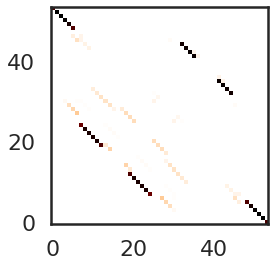

eternafold
(((((((((((((......))))))..)....((((.....))))...))))))
-13.7489


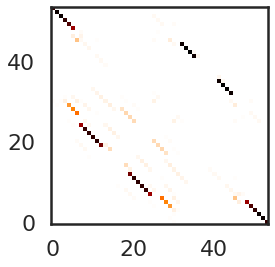

contrafold_2
(((((((((((((......))))))..)....((((.....))))...))))))
-6.87394


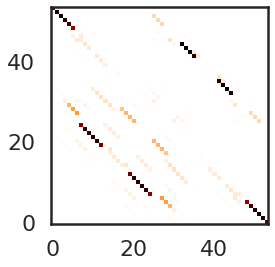

In [ ]:
seq = 'CGCUGUCUGUACUUGUAUCAGUACACUGACGAGUCCCUAAAGGACGAAACAGCG'
packages=['vienna_2', 'eternafold', 'contrafold_2']
for packages in packages:
  print (packages)
  print (mfe(seq, package=packages))
  print (free_energy(seq, package=packages))
  bp_matrix=bpps(seq, package=packages)
  plt.imshow(bp_matrix, origin='lower left', cmap='gist_heat_r')
  plt.show()